## Labarotorio 4 Inteligencia Artificial 

### Task 1.1. Leer el archivo CSV proporcionado (kc_house_data.csv dentro de lab4_dataset.zip) y almacenarlo en un p.array para ser trabajado en el notebook.

Para iniciar con este proceso, primero se deben importar las librerías correspondientes.

In [10]:
#Importar librerias
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split

Posteriormente, ya se pueden importar los datos y almacenarlos en una matriz de NumPy.

In [11]:
data = pd.read_csv('kc_house_data.csv')
data_numpy = np.array(data)

print(data_numpy)

[[7129300520 '20141013T000000' 221900.0 ... -122.257 1340 5650]
 [6414100192 '20141209T000000' 538000.0 ... -122.319 1690 7639]
 [5631500400 '20150225T000000' 180000.0 ... -122.233 2720 8062]
 ...
 [1523300141 '20140623T000000' 402101.0 ... -122.299 1020 2007]
 [291310100 '20150116T000000' 400000.0 ... -122.069 1410 1287]
 [1523300157 '20141015T000000' 325000.0 ... -122.299 1020 1357]]


Finalmente, se separa las columnas a analizar, de precio y pies cuadrados, en numpy arrays para poder realizar las futuras operaciones.

In [12]:
Y = data["price"]  # price
X = data["sqft_living"]  # sqft living

# Almacenar datos en numpy array
x = np.array(X)
y = np.array(Y)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

Finalmente, podemos graficar los datos para entender el modelo respectivo.

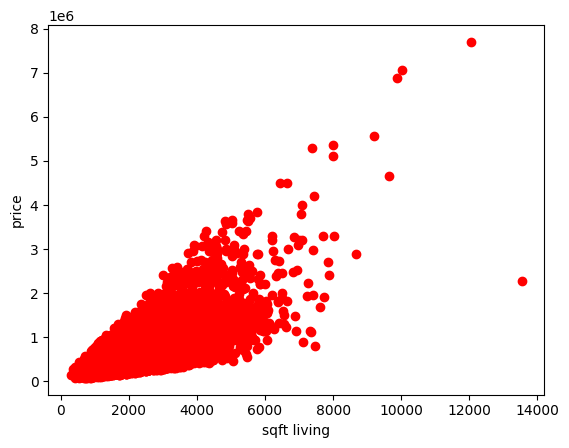

In [13]:
# Graficar datos con nombre de ejes
plt.xlabel("sqft living")
plt.ylabel("price")
plt.scatter(x, y, color="red")

### Task 1.2. Ajustar un modelo polinomial (regresión lineal) en base al juego de datos cargado de forma matricial que relaciona las variables de precio con los pies cuadrados del espacio habitable interior de los apartamentos (price - sqft living).

Ahora se crearan las respectivas matrices y vectores para posteriormente poder hacer el cálculo y crear el modelo de regresión lineal. Estas matrices relacionan las variables de precio con los pies cuadrados de living space.

In [14]:
# matriz w = almacena w0, w1, ..., wn
# matriz x = almacena 1, xn^1, xn^2, ..., xn^n
# matriz X = almacena 1, x1, x1^2, ..., x1^n; 1, x2, x2^2, ..., x2^n; ...; 1, xm, xm^2, ..., xm^n
# matriz t = almacena t1, t2, ..., tm // valores reales

def matrices(grado, N):
    # Matriz de caracteristicas = X
    X_matrix = np.array([[x_train[i] ** j for j in range(0, grado+1)] for i in range(N)])
    #print("\nMatriz de Caracteristicas (Shape) (X):",X_matrix.shape)

    # Matriz de valores reales (t) = wT * X
    Y_matrix = np.array([[y_train[i]] for i in range(N)])
    #print("Matriz de Valores Reales (Shape):",Y_matrix.shape)

    # Matriz de pesos aleatorios w
    W_matrix = np.array([[random.random()] for i in range(grado+1)])
    #print("Matriz de Pesos Aleatorios (Shape):",W_matrix.shape)

    return X_matrix, Y_matrix, W_matrix

grado = 1
N = len(x_train)

X_matrix, Y_matrix, W_matrix = matrices(grado, N)

#### Ajuste de modelo polinomial dada la forma matricial
En base a las matrices anteriormente creadas, se puede calcular el valor "teórico" de los pesos w0 y w1 a través de la siguiente función. 
[B0, B1] = (X^T.X)^-1 * (X^T.Y)


>esto no era requerido, sin embargo se quería tener un punto de referencia


Matriz de Pesos (w): [[-30186.36106106]
 [   273.82181112]]


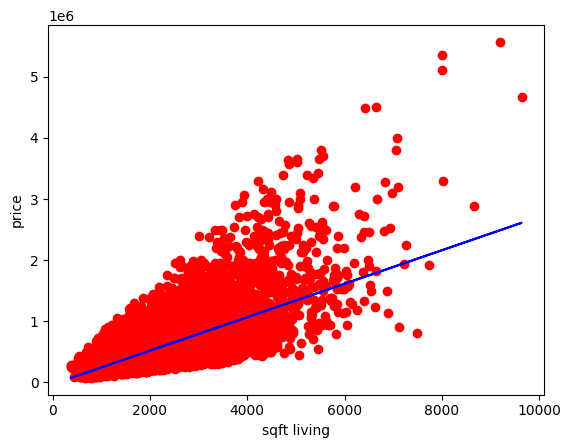

In [15]:
# En este caso, se calculó el valor teórico de w0 y w1 dado las matrices X y Y.
# Matriz w
w = np.linalg.inv(X_matrix.T.dot(X_matrix)).dot((X_matrix.T).dot(Y_matrix))
print("\nMatriz de Pesos (w):",w)

# Graficar w0 y w1 con los datos
plt.scatter(x_train, y_train, color="red")
plt.xlabel("sqft living")
plt.ylabel("price")
plt.plot(x_train, X_matrix.dot(w), color="blue")
plt.show()

### Task 1.3. Utilice la implementación vectorial del algoritmo de regresión lineal (descenso del gradiente visto en clase).
Ya que anteriormente se creó el modelo polinomial de forma matricial (se crearon las respectivas matrices), ahora se puede implementar el descenso del grandiente para terminar el respectovo modelo.

Como primer paso, se creó un ciclo for que iba analizando el peso del vector. Posteriormente, iba calculando el error de valores predichos dado el peso del vector modificado. Con eso, calculaba la función perdida; que indicaba el gradiente. Finalmente, se iba actualizando los pesos.

In [16]:
def gradiente_error(X_matrix, Y_matrix, W_matrix, N):
    # Tasa de aprendizaje y número de iteraciones
    learning_rate = 0.000000001
    num_iter = 10000

    error = []

    for i in range(num_iter):

        # Calcular el error (Valor real vs. Valor predicho)
        funcion_perdida = (1/N) * (((Y_matrix - X_matrix.dot(W_matrix)).T).dot(Y_matrix - X_matrix.dot(W_matrix)))
        error.append(funcion_perdida[0][0])

        # Calcular el gradiente
        gradiente = -(2/N) * (X_matrix.T).dot(Y_matrix - X_matrix.dot(W_matrix))
        
        # Actualizar los pesos
        W_matrix = W_matrix - (learning_rate * gradiente)

    return W_matrix, error[-1]

N = len(x_train)
grado = 1
X_matrix, Y_matrix, W_matrix = matrices(grado, N)

W_matrix, error = gradiente_error(X_matrix, Y_matrix, W_matrix, N)

# Imprimir los pesos y la última pérdida
print("\nPesos obtenidos con Gradiente (W):", W_matrix)
print("Último error:", error)


Pesos obtenidos con Gradiente (W): [[  0.96724558]
 [261.59171382]]
Último error: 64200800790.568634


Como se puede observar, los pesos obtenidos son muy similares a lo que anteriormente se calculó. Así confirmando el proceso del descenso de gradiente implementado.

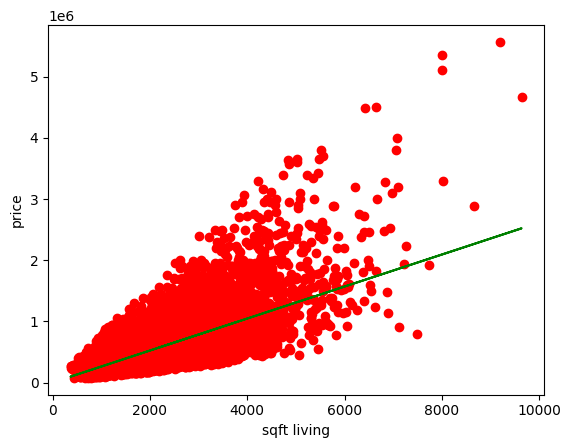

In [17]:
# Graficar w0 y w1 con los datos experimentales
plt.scatter(x_train, y_train, color="red")
plt.xlabel("sqft living")
plt.ylabel("price")
plt.plot(x_train, X_matrix.dot(W_matrix), color="green")
plt.show()

### Task 1.4 Usando cross-validation determine el grado del polinomio que mejor describe la nube de puntos (encuentre el mejor balance entre apego a los datos de entrenamiento y generalización para datos previamente no observados).

In [26]:

#funcion para calcular cross validation
def cross_val_matrix(index, CrossVal):
    x = []
    y = []
    for i in  range(len(CrossVal)):
        if i != index:
            x.extend(CrossVal[i][0])
            y.extend(CrossVal[i][1])
        
    return np.array(x), np.array(y)


CrossVal = []

for i in range(0, 5):    
    x_train_split = x_train[i*len(x_train)//5 :(i+1)*len(x_train)//5 ]
    y_train_split = y_train[i*len(x_train)//5 :(i+1)*len(x_train)//5 ]
    CrossVal.append([x_train_split, y_train_split])
    
CrossVal = np.array(CrossVal)

ErrorArray = []

# Calculo de error para cada polinomio hasta el grado 3
for pol in range(1, 4):

    errorInt = 0
    
    # Calculo de error para cada partición
    for i in range(0, 5):
        
        # Obtener las matrices de entrenamiento
        x_train_split, y_train_split = cross_val_matrix(i, CrossVal)
       
        # matrices
        X_matrix, Y_matrix, W_matrix = matrices(pol, len(x_train_split))

        # Gradiente
        W_matrix, error = gradiente_error(X_matrix, Y_matrix, W_matrix, len(x_train_split))

        # Error
        errorInt += error
        
    # Agregar el error promedio a la lista de errores para cada polinomio
    ErrorArray.append(errorInt/5)
    

# Encontrar el grado de polinomio con el menor error
mejor_pol = ErrorArray.index(min(ErrorArray)) + 1
print(f"Polinomio de grado {mejor_pol} se ajusta mejor al modelo y tienen un error de {min(ErrorArray)}")

C:\Users\carev\AppData\Local\Temp\ipykernel_3044\1769487386.py:18: RuntimeWarning: invalid value encountered in subtract
  W_matrix = W_matrix - (learning_rate * gradiente)


Polinomio de grado 1 se ajusta mejor al modelo y tienen un error de 62714982110.53288


### Task 1.5. Haga un análisis sobre sus hallazgos.
Al analizar los datos del sobre la relación del tamaño y precio de una vivienda, se puede observar que estas dos variables tienen una relación lineal. Aunque algunos de los datos se salen del modelo creado utilizando una regresión lineal de grado 1, la validación cruzada del inciso 1.4 confirma que un modelo polinomial de grado 1 es el que mejor se ajusta a los datos. Al finalizar con este laboratorio, se pudó observar la importancia de la validación cruzada de los resultados. Esto se debe a, que a simple vista, la gráfica contiene tantos puntos que no se puede observar si la regresión lineal es la correcta. Al verificar el error de varios módelos diferentes, se puede asegurar que el modelo creado es el más adecuado para los datos. Esto no solamente nos sirve para validar los resultados obtenidos, también le de mayor credibilidad a los resultados al momento que otra persona revise nuestros resultados. Al utilizar dos métodos diferentes y obtener el mismo resultado en ambos, se puede asegurar que el resultado obtenido es el correcto.